In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [ ]:
x_train=x_train/255
x_test=x_test/255

FIRST IMAGE


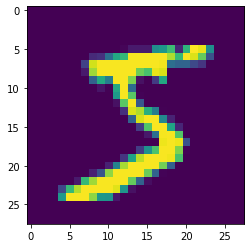

SECOND IMAGE


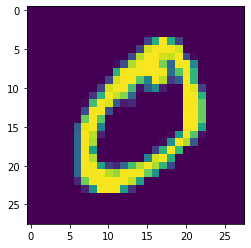

In [ ]:
print("FIRST IMAGE")
plt.imshow(x_train[0])
plt.show()
print("SECOND IMAGE")
plt.imshow(x_train[1])

In [ ]:
from tensorflow.keras.layers import  GaussianNoise

In [ ]:
sample=GaussianNoise(0.2)

In [ ]:
noise_img=sample(x_train[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



ORIGINAL IMAGE


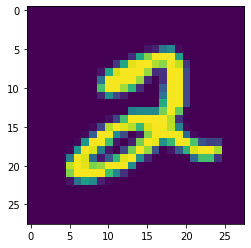

NOISE-ADDED IMAGE


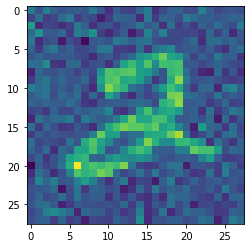

In [ ]:
print("ORIGINAL IMAGE")
plt.imshow(x_train[5])
plt.show()
print("NOISE-ADDED IMAGE")
plt.imshow(noise_img[5])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape

In [ ]:
encoder=Sequential()

In [ ]:

encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [ ]:
noise_remover=Sequential([encoder,decoder])

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
noise_remover.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.5),metrics=['accuracy'])

In [ ]:
noise_remover.fit(x_train,x_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 396us/sample - loss: 0.2796 - accuracy: 0.7880
Epoch 2/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.2341 - accuracy: 0.7943
Epoch 3/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.2019 - accuracy: 0.7947
Epoch 4/5
60000/60000 [==============================] - 23s 379us/sample - loss: 0.1792 - accuracy: 0.7981
Epoch 5/5
60000/60000 [==============================] - 23s 377us/sample - loss: 0.1640 - accuracy: 0.8013


In [ ]:
img_without_noise=noise_remover(noise_img[:10])

ORIGINAL IMAGE


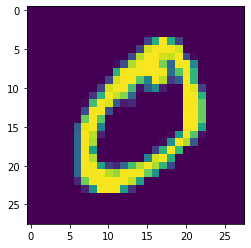

NOISE REMOVED IMAGE FROM AUTOENCODER


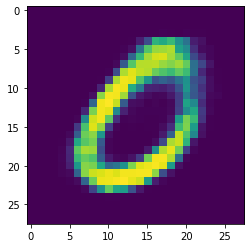

In [ ]:
print('ORIGINAL IMAGE')
plt.imshow(x_train[1])
plt.show()
print('NOISE REMOVED IMAGE FROM AUTOENCODER')
plt.imshow(img_without_noise[1])

In [ ]:
img_without_noise=noise_remover.pr